In [5]:
import torch
import numpy as np

print(torch.normal(mean=torch.zeros(10), std=torch.tensor([np.pi/8])))

tensor([-0.2894,  0.4339,  0.5755,  0.2076, -0.2218,  0.1594,  0.2430, -0.1686,
         0.3068,  0.0460])


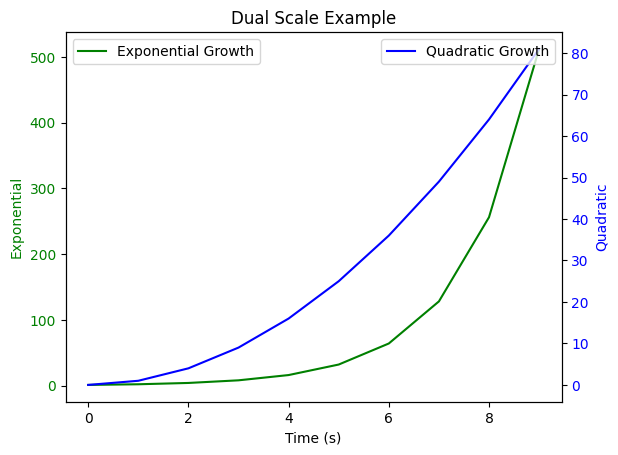

In [6]:
import matplotlib.pyplot as plt

# Sample data
x = range(10)
y1 = [2**n for n in x]
y2 = [n**2 for n in x]

# Creating figure and axis objects
fig, ax1 = plt.subplots()

# Plotting the first dataset on the primary y-axis
ax1.plot(x, y1, 'g-', label='Exponential Growth')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Exponential', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Creating a twin axis for the second dataset
ax2 = ax1.twinx()
ax2.plot(x, y2, 'b-', label='Quadratic Growth')
ax2.set_ylabel('Quadratic', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Adding a title and legends
plt.title('Dual Scale Example')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


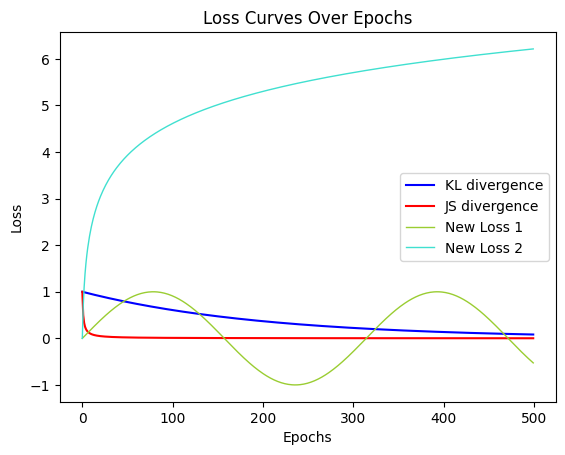

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
epochs = np.arange(0, 500, 1)
loss1 = np.exp(-0.005 * epochs)  # Exponential decay
loss2 = 1 / (1 + epochs)         # Hyperbolic decay
new_loss1 = np.sin(0.02 * epochs)  # Sine wave, example new loss curve
new_loss2 = np.log(1 + epochs)    # Logarithmic growth, example new loss curve

fig, ax = plt.subplots()

# Existing loss curves
ax.plot(epochs, loss1, 'b-', label='KL divergence')
ax.plot(epochs, loss2, 'r-', label='JS divergence')

# New loss curves
ax.plot(epochs, new_loss1, 'yellowgreen', label='New Loss 1', linewidth=1)  # Green curve
ax.plot(epochs, new_loss2, 'turquoise', label='New Loss 2', linewidth=1)  # Orange curve

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss Curves Over Epochs')
ax.legend()

plt.show()


In [2]:
import torch

n_qubit = 3
sigmas = [1, 2, 3]

def to_binary(x):
        r = torch.arange(n_qubit)
        to_binary_op = torch.ones_like(r) << r  # (n_qubit,)
        return ((x.unsqueeze(-1) & to_binary_op) > 0).long()

def make_K(sigmas: list):
    sigmas = torch.Tensor(sigmas)
    r = to_binary(torch.arange(2 ** n_qubit)).float()  # (2 ** n_qubit, n_qubit)

    x = r.unsqueeze(1)  # (2 ** n_qubit, 1, n_qubit)
    y = r.unsqueeze(0)  # (1, 2 ** n_qubit, n_qubit)
    
    # print(x)
    # print(y)
    
    norm_square = (x** 2 + y ** 2 - 2 * x * y).sum(dim=-1)  # (2 ** n_qubit, 2 ** n_qubit)
    
    print(norm_square)
    
    K = (-norm_square.unsqueeze(-1) / (2 * sigmas)).exp().sum(dim=-1)  # (2 ** n_qubit, 2 ** n_qubit)
    return K.double()

make_K(sigmas)

tensor([[0., 1., 1., 2., 1., 2., 2., 3.],
        [1., 0., 2., 1., 2., 1., 3., 2.],
        [1., 2., 0., 1., 2., 3., 1., 2.],
        [2., 1., 1., 0., 3., 2., 2., 1.],
        [1., 2., 2., 3., 0., 1., 1., 2.],
        [2., 1., 3., 2., 1., 0., 2., 1.],
        [2., 3., 1., 2., 1., 2., 0., 1.],
        [3., 2., 2., 1., 2., 1., 1., 0.]])


tensor([[3.0000, 2.2318, 2.2318, 1.6909, 2.2318, 1.6909, 1.6909, 1.3020],
        [2.2318, 3.0000, 1.6909, 2.2318, 1.6909, 2.2318, 1.3020, 1.6909],
        [2.2318, 1.6909, 3.0000, 2.2318, 1.6909, 1.3020, 2.2318, 1.6909],
        [1.6909, 2.2318, 2.2318, 3.0000, 1.3020, 1.6909, 1.6909, 2.2318],
        [2.2318, 1.6909, 1.6909, 1.3020, 3.0000, 2.2318, 2.2318, 1.6909],
        [1.6909, 2.2318, 1.3020, 1.6909, 2.2318, 3.0000, 1.6909, 2.2318],
        [1.6909, 1.3020, 2.2318, 1.6909, 2.2318, 1.6909, 3.0000, 2.2318],
        [1.3020, 1.6909, 1.6909, 2.2318, 1.6909, 2.2318, 2.2318, 3.0000]],
       dtype=torch.float64)

In [9]:
import torch

space = torch.arange(2 ** 3)

sq_dists = torch.abs(space[:, None] - space[None, :]) ** 2
sigmas = torch.Tensor([1, 2, 3])

K = sq_dists.unsqueeze(-1) / sigmas
K.sum(dim=-1)

tensor([[ 0.0000,  1.8333,  7.3333, 16.5000, 29.3333, 45.8333, 66.0000, 89.8333],
        [ 1.8333,  0.0000,  1.8333,  7.3333, 16.5000, 29.3333, 45.8333, 66.0000],
        [ 7.3333,  1.8333,  0.0000,  1.8333,  7.3333, 16.5000, 29.3333, 45.8333],
        [16.5000,  7.3333,  1.8333,  0.0000,  1.8333,  7.3333, 16.5000, 29.3333],
        [29.3333, 16.5000,  7.3333,  1.8333,  0.0000,  1.8333,  7.3333, 16.5000],
        [45.8333, 29.3333, 16.5000,  7.3333,  1.8333,  0.0000,  1.8333,  7.3333],
        [66.0000, 45.8333, 29.3333, 16.5000,  7.3333,  1.8333,  0.0000,  1.8333],
        [89.8333, 66.0000, 45.8333, 29.3333, 16.5000,  7.3333,  1.8333,  0.0000]])

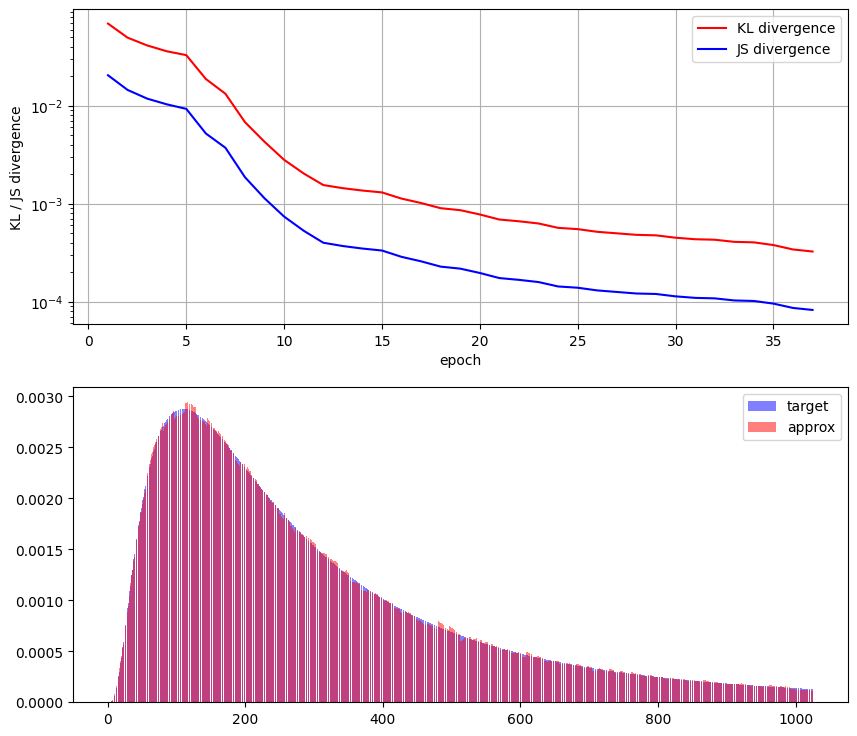

In [4]:
import json
import matplotlib.pyplot as plt 
from matplotlib import gridspec
from data import *
import numpy as np

file_prefix = "ACLBM(data=log normal 10, No=3, t1=0.001, t2=0.005)"

file_path = "./results/ACLBM/" + file_prefix + ".json"

with open(file_path, 'r') as f:
    result_dict = json.load(f)
    kl_history = result_dict['kl div']
    js_history = result_dict['js div']
    prob = np.array(result_dict['pmf'])
    
target_prob = DATA_HUB['log normal 10'].get_data()

filename = "./images/ACLBM/" + file_prefix + ".png"

fig = plt.figure(figsize=(10, 9))
gs = gridspec.GridSpec(2, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

n_epoch = len(kl_history['epoch'])

ax1.semilogy(np.arange(n_epoch)+1, kl_history['epoch'], label='KL divergence', color='red')
ax1.semilogy(np.arange(n_epoch)+1, js_history['epoch'], label='JS divergence', color='blue')
ax1.set_xlabel('epoch')
ax1.set_ylabel('KL / JS divergence')
ax1.grid()
ax1.legend(loc='upper right')

# ax2.imshow(prob.detach().cpu().numpy().reshape(256, 256))
    

ax2.bar(np.arange(prob.shape[0])+1, target_prob, alpha=0.5, color='blue', label='target')
ax2.bar(np.arange(prob.shape[0])+1, prob, alpha=0.5, color='red', label='approx')
ax2.legend(loc='upper right')

plt.savefig(filename)

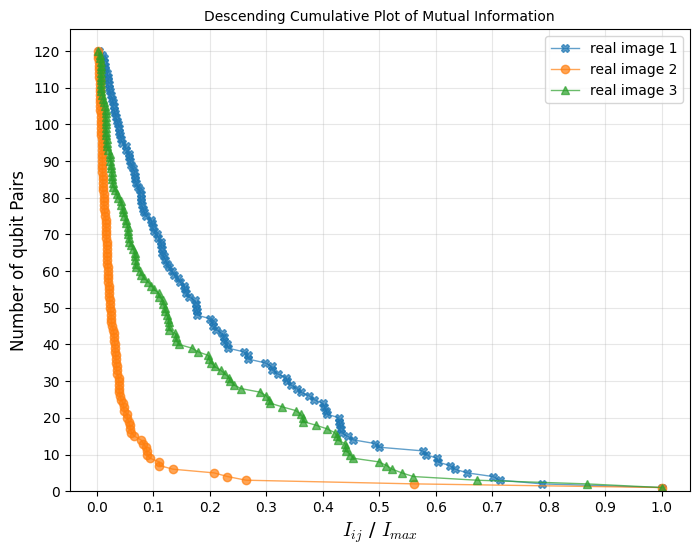

In [30]:
from data import *
from utils import *
import numpy as np
import torch
import matplotlib.pyplot as plt

def entanglement_measure(target_prob, n_qubit):

    state = torch.sqrt(target_prob)
    ent_list = []
    
    for i in range(n_qubit):
        for j in range(i+1, n_qubit):
            MI = mutual_information(state, subsystems=(i, j))
            EOF = entanglement_of_formation(state, subsystems=(i, j))
            ent_list.append([(i, j), MI, EOF])

    ent_list = sorted(ent_list, key=lambda x: x[1], reverse=True)

    return ent_list

target_prob1 = torch.Tensor(DATA_HUB['real image 1'].get_data()).double()
result1 = entanglement_measure(target_prob1, 16)
target_prob2 = torch.Tensor(DATA_HUB['real image 2'].get_data()).double()
result2 = entanglement_measure(target_prob2, 16)
target_prob3 = torch.Tensor(DATA_HUB['real image 3'].get_data()).double()
result3 = entanglement_measure(target_prob3, 16)



mutual_infos1 = np.array([result1[i][1] for i in range(len(result1))][::-1])
mutual_infos1 = mutual_infos1 / mutual_infos1[-1]
cumulative_count1 = np.arange(len(mutual_infos1), 0, -1)
mutual_infos2 = np.array([result2[i][1] for i in range(len(result2))][::-1])
mutual_infos2 = mutual_infos2 / mutual_infos2[-1]
cumulative_count2 = np.arange(len(mutual_infos2), 0, -1)
mutual_infos3 = np.array([result3[i][1] for i in range(len(result3))][::-1])
mutual_infos3 = mutual_infos3 / mutual_infos3[-1]
cumulative_count3 = np.arange(len(mutual_infos3), 0, -1)


plt.figure(figsize=(8, 6))
plt.plot(mutual_infos1, cumulative_count1, marker='X', linestyle='-', label='real image 1', lw=1, alpha=0.7)
plt.plot(mutual_infos2, cumulative_count2, marker='o', linestyle='-', label='real image 2', lw=1, alpha=0.7)
plt.plot(mutual_infos3, cumulative_count3, marker='^', linestyle='-', label='real image 3', lw=1, alpha=0.7)
plt.xlabel('$I_{ij}$ / $I_{max}$', math_fontfamily='cm', size=14)
plt.ylabel('Number of qubit Pairs', font="DejaVu Sans", size=12)
plt.xticks(np.linspace(0, 1.0, 11))
plt.yticks(np.linspace(0, 120, 13))
plt.ylim(bottom=0)
plt.title('Descending Cumulative Plot of Mutual Information', font="DejaVu Sans")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()